# Import

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB
None


In [ ]:
RANDOM_STATE = 918

# 데이터 살펴보기

## Feature Selection

In [ ]:
# string 열마다, 범주형 변수들의 class 개수 파악
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

# string column들만
for i in range(df.shape[1]):
    temp = df.iloc[:,i]
    # numeric 데이터는 살펴보지 않음
    if (is_numeric_dtype(temp)): continue

    col_name = df.columns[i]
    print('------------ ' , col_name, ' -------------')
    print(temp.value_counts().shape[0])
    print()

------------  country  -------------
43

------------  description  -------------
97550

------------  designation  -------------
32961

------------  province  -------------
407

------------  region_1  -------------
1188

------------  region_2  -------------
17

------------  taster_name  -------------
19

------------  taster_twitter_handle  -------------
15

------------  title  -------------
96761

------------  variety  -------------
676

------------  winery  -------------
15735



country  
province  
taster_name   
variety
범주형 변수 중에 4개 고르기

In [ ]:
print(df['region_1'].value_counts())
print(df['region_2'].value_counts())

Napa Valley               3599
Columbia Valley (WA)      3296
Russian River Valley      2459
California                2067
Paso Robles               1917
                          ... 
McLaren Vale-Padthaway       1
Mâcon-Charnay                1
Strevi                       1
Mâcon Chaintré               1
Côtes de Forez               1
Name: region_1, Length: 1188, dtype: int64
Central Coast        8910
Sonoma               7185
Columbia Valley      6497
Napa                 5442
Willamette Valley    2741
California Other     2095
Finger Lakes         1440
Sierra Foothills     1151
Napa-Sonoma           932
Central Valley        856
Southern Oregon       739
Oregon Other          588
Long Island           550
North Coast           463
Washington Other      418
South Coast           214
New York Other        187
Name: region_2, dtype: int64


1. 같은 taster는 같은 taster_name을 갖고 있지 않을까?
--> 만약 그렇다면 taster_name과 taster_twitter_handle 두 피처 중 하나는 없어도 될 것 같다.

In [ ]:
temp = df.copy()

2. categorical feature들과 points 사이의 관계

In [ ]:
temp = df[['country','points']]
temp.groupby('country').mean().sort_values(by = 'points', ascending = False)

,points
country,
England,91.70
India,90.25
Austria,90.12
Germany,89.81
Canada,89.45
Hungary,89.30
China,89.00
France,88.85
Luxembourg,88.60


In [ ]:
temp = df[['province', 'points']]
temp.groupby('province').mean().sort_values(by = 'points', ascending = False)

,points
province,
Südburgenland,94.00
Madeira,92.67
Mittelrhein,92.25
England,91.70
Wachau,91.53
...,...
Ticino,83.00
Kentucky,83.00
Cahul,82.50


In [ ]:
temp = df[['region_1', 'points']]
temp.groupby('region_1').mean().sort_values(by = 'points', ascending = False)

,points
region_1,
Bienvenues Bâtard-Montrachet,96.50
Bolgheri Sassicaia,96.17
Napa-Monterey-Mendocino,96.00
Corton-Pougets,96.00
Montrachet,96.00
...,...
Penisola Sorrentina,82.50
Catalonia,81.33
Ramona Valley,80.50


In [ ]:
temp = df[['region_2', 'points']]
temp.groupby('region_2').mean().sort_values(by = 'points', ascending = False)
# region2는 상대적으로 points에 큰 영향이 없는듯

,points
region_2,
Willamette Valley,89.46
Napa,89.39
Columbia Valley,88.97
Sonoma,88.92
Central Coast,88.82
Napa-Sonoma,88.77
Oregon Other,88.52
Washington Other,88.29
Sierra Foothills,88.24


In [ ]:
temp = df[['taster_name', 'points']]
temp.groupby('taster_name').mean().sort_values(by = 'points', ascending = False)

,points
taster_name,
Anne Krebiehl MW,90.55
Matt Kettmann,90.03
Virginie Boone,89.20
Mike DeSimone,89.08
Paul Gregutt,89.07
Kerin O’Keefe,88.87
Sean P. Sullivan,88.73
Roger Voss,88.71
Jim Gordon,88.62


In [ ]:
temp = df[['taster_twitter_handle', 'points']]
temp.groupby('taster_twitter_handle').mean().sort_values(by = 'points', ascending = False)

,points
taster_twitter_handle,
@AnneInVino,90.55
@mattkettmann,90.03
@vboone,89.20
@paulgwine,89.07
@kerinokeefe,88.87
@wawinereport,88.73
@vossroger,88.71
@worldwineguys,88.69
@gordone_cellars,88.62


taster_name보다 taster_twitter_handle의 결측치가 더 많다는 점   
taster_name과 taster_twitter_hanlde의 이름이 비슷한 경우가 많다는 점
그리고 비슷한 이름끼리 부여한 평균 점수도 비슷하다는 점, 즉 이름을 표현하는 방식만 다른 것으로 보인다.

따라서, 두 피쳐는 비슷한 정보를 담고 있는 것으로 이해할 수 있다.
소믈리에 중에서 트위터를 하지 않는 사람은 트위터 정보가 없으므로 twitter 피처의 결측치가 더 많은 것으로 추측된다.   
따라서, 더 많은 정보를 담고 있고 다른 하나를 포함하는 taster_name만 사용해도 될 것 같다. 

In [ ]:
temp = df[['variety', 'points']]
temp.groupby('variety').mean().sort_values(by = 'points', ascending = False)

,points
variety,
Tinta del Pais,95.00
Gelber Traminer,95.00
Bual,94.40
Riesling-Chardonnay,94.00
Sercial,94.00
...,...
Aidani,82.00
Picapoll,82.00
Airen,81.67


label값은 분포가 잘 돼있다.

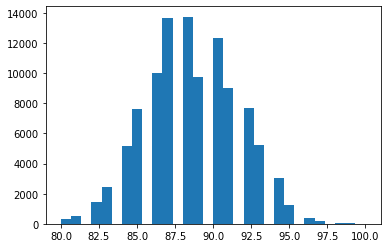

In [ ]:
plt.hist(df['points'], bins = 30)
plt.show()

# PreProcessing

In [ ]:
# feature selection
temp = df[['country', 'price', 'province', 'taster_name', 'variety', 'points']]
# 결측치 레코드 제거
temp.dropna(axis = 0, inplace = True)

print(temp.head())
print(temp.info())

     country  price         province        taster_name        variety  points
0  Australia   5.00  Australia Other     Joe Czerwinski     Chardonnay      83
1     France  12.00     Rhône Valley         Roger Voss           Rosé      85
2      Spain   9.00   Northern Spain  Michael Schachner  Verdejo-Viura      86
5         US  22.00       California         Jim Gordon     Chardonnay      90
6         US  33.00           Oregon       Paul Gregutt     Pinot Noir      90
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77148 entries, 0 to 103975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      77148 non-null  object 
 1   price        77148 non-null  float64
 2   province     77148 non-null  object 
 3   taster_name  77148 non-null  object 
 4   variety      77148 non-null  object 
 5   points       77148 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.1+ MB
None


In [ ]:
X = temp.drop('points', axis=  1)
y = temp['points']

In [ ]:
# 원본 저장
origin = X.copy()

## OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_country = OneHotEncoder(handle_unknown = 'ignore')
ohe_province = OneHotEncoder(handle_unknown = 'ignore')
ohe_taster_name = OneHotEncoder(handle_unknown = 'ignore')
ohe_variety = OneHotEncoder(handle_unknown = 'ignore')

# 범주형 변수 4개 원핫 인코딩 (결과값은 np.array)
country_np = ohe_country.fit_transform(X[['country']])
province_np = ohe_province.fit_transform(X[['province']])
taster_name_np = ohe_taster_name.fit_transform(X[['taster_name']])
variety_np = ohe_variety.fit_transform(X[['variety']])


In [ ]:
# np.array dataframe으로 변환
country_df = pd.DataFrame.sparse.from_spmatrix(country_np, columns=['country_' + col for col in ohe_country.categories_[0]])
country_df.reset_index(drop=True, inplace = True)

province_df = pd.DataFrame.sparse.from_spmatrix(province_np, columns=['province_' + col for col in ohe_province.categories_[0]])
province_df.reset_index(drop=True, inplace = True)

taster_name_df = pd.DataFrame.sparse.from_spmatrix(taster_name_np, columns=['taster_' + col for col in ohe_taster_name.categories_[0]])
taster_name_df.reset_index(drop=True, inplace = True)

variety_df = pd.DataFrame.sparse.from_spmatrix(variety_np, columns=['variety_' + col for col in ohe_variety.categories_[0]])
variety_df.reset_index(drop=True, inplace = True)


X_price = X.drop(['country', 'province', 'taster_name', 'variety'], axis=1)
X_price.reset_index(drop=True, inplace = True)

# one hot encoding 한거 다 합치기
X = pd.concat([X_price, country_df, province_df, taster_name_df, variety_df], axis=1)

In [ ]:
X_ohe = X.copy()

+ price 아웃라이어 제거

Before : 
count   77148.00
mean       35.11
std        44.71
min         4.00
25%        17.00
50%        25.00
75%        40.00
max      3300.00
Name: price, dtype: float64

After : 
count   73280.00
mean       29.10
std        16.71
min         4.00
25%        16.00
50%        25.00
75%        38.00
max        84.00
Name: price, dtype: float64 



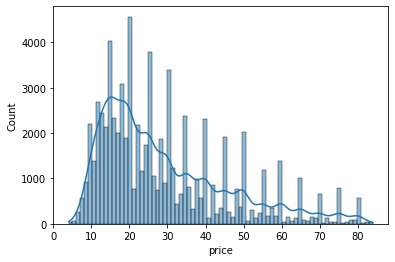

In [ ]:
# price에 너무 큰 아웃라이어가 있다.
# 0.95 정도로 제거하면 아웃라이어 처리 완료

temp = X['price']
print( 'Before : ')
print(temp.describe())
print()
print('After : ')
temp = temp[temp < temp.quantile(0.95)]

print(temp.describe(), '\n')

sns.histplot(x = temp, kde = True)

In [ ]:
# Price 아웃라이어 정리
y.reset_index(drop=True, inplace= True)
boolean_index = X['price'] < X['price'].quantile(0.95)
X = X[boolean_index]
y = y[boolean_index]

# Training

### Import

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Data Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)

In [ ]:
# 인덱스가 더러워져서, 인덱스 처리
X.reset_index(drop = True, inplace = True)
y.reset_index(drop = True, inplace = True)
X_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace=  True)
y_val.reset_index(drop= True, inplace = True)

In [ ]:
print(X.info())
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73280 entries, 0 to 73279
Columns: 1084 entries, price to variety_Žilavka
dtypes: Sparse[float64, 0](1083), float64(1)
memory usage: 3.9 MB
None
(73280,)


### metric_function

+ eval_kfold()   

자동으로 5 fold evaluation 해주는  cross_vale_score 함수를 이용   
mse, rmse, 평균 rmse를 출력



In [ ]:
def eval_kfold(model ,X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores) 

    print('Each Negative MSE scores : ', np.round(neg_mse_scores, 2))
    print('Each RMSE scores : ', np.round(rmse_scores, 2))
    print(f'AVG RMSE : {avg_rmse:.2f}')



## Linear Regression

### Basic Linear Regression

우선 선형회귀를 적용해보자

In [ ]:
lr = LinearRegression()
eval_kfold(lr, X, y)

Each Negative MSE scores :  [-4.82000000e+00 -2.56770780e+17 -6.33341437e+16 -9.89799408e+16
 -1.24064710e+18]
Each RMSE scores :  [2.19000000e+00 5.06725547e+08 2.51662758e+08 3.14610777e+08
 1.11384339e+09]
AVG RMSE : 437368495.17


결과가 상당히 안좋다. 원인이 무엇일까? 우선 계수들을 살펴보자   
계수들을 절대값이 큰 순서대로 정렬해보았다.

계수들이 엄청나게 크다 과적합의 의심된다.   
직접 모델을 돌려보고 train데이터와 test(validation)데이터에서의 성능 차이를 살펴보자

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train) # 학습
y_train_preds = lr.predict(X_train) # 학습한 데이터와 같은 데이터로 예측
y_val_preds = lr.predict(X_val) # validation set 데이터로 예측

train_set_mse = mean_squared_error(y_pred = y_train_preds, y_true = y_train) 
val_set_mse = mean_squared_error(y_pred = y_val_preds, y_true = y_val)

print(f'Train set MSE : {train_set_mse:.2f}')
print(f'Validation set MSE : {val_set_mse:.2f}')

Train set MSE : 4.66
Validation set MSE : 1789993069690905.25


엄청나게 과적합 되어 있는 것을 확인할 수 있다.    
Regularization을 적용하자.

그전에, price가 좌편향 되어있었으므로, 로그변환을 적용해보자

X_log <- 로그 적용 후 데이터

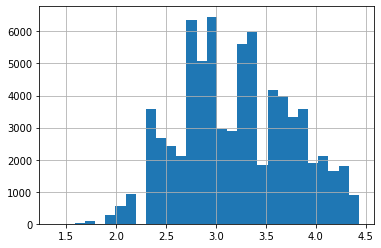

In [ ]:
X_log = X.copy()
X_log['price'] = np.log(X_log['price'])
X_log['price'].hist(bins = 30)

In [ ]:
lr = LinearRegression()
eval_kfold(lr, X_log, y)

Each Negative MSE scores :  [-2.71781916e+18 -5.64886292e+21 -1.63937607e+18 -1.86928398e+17
 -4.57198027e+17]
Each RMSE scores :  [1.64858095e+09 7.51589178e+10 1.28038122e+09 4.32352169e+08
 6.76164201e+08]
AVG RMSE : 15839279261.64


훨씬 정규분포에 가까워진 모습이다.   
하지만 아직 정규화를 하지 않았기 때문에 과적합 문제가 해결되지 않았다.  
정규화를 시작해보자

### Regularization

+ Ridge, Lasso, ElasticNet 사용

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

우선, 로그 변환이 유효한지 보기위해 기본 모델로 비교를 해보았다.

In [ ]:
ridge = Ridge(alpha = 10)
print('Log Transformed : ')
eval_kfold(ridge, X_log, y)
print()
print('Original: ')
eval_kfold(ridge, X, y)

Log Transformed : 
Each Negative MSE scores :  [-4.54 -4.6  -4.67 -4.5  -4.5 ]
Each RMSE scores :  [2.13 2.14 2.16 2.12 2.12]
AVG RMSE : 2.14

Original: 
Each Negative MSE scores :  [-4.78 -4.83 -4.88 -4.73 -4.73]
Each RMSE scores :  [2.19 2.2  2.21 2.18 2.17]
AVG RMSE : 2.19


log 변환이 조금 더 성능이 좋아보인다. price가 천개가 넘는 피처에서 영향력이 그리 크지 않기 때문으로 보인다.   
차이가 크지 않고 로그데이터가 더 좋기 때문에 앞으로는 로그 데이터 값으로만 진행하려고 한다.

In [ ]:
# Regularization 적용시 사용할 평가 함수
def linear_reg_model_eval(model_name, alphas, X_data, y_target) :

    print('--------------- ', model_name, ' ---------------')

    for alpha in alphas:
        if model_name == 'Ridge' : model = Ridge(alpha = alpha)
        elif model_name == 'Lasso' : model = Lasso(alpha= alpha)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = alpha, l1_ratio = 0.7)
        else : 
            print('Invalid model name!'); return;

        print('alpha = ', alpha, ' )')
        eval_kfold(model, X_data, y)
        print()


In [ ]:
# 사용할 alpha 값
alphas = [0.07, 0.1, 0.5, 1, 3, 5, 10]

In [ ]:
# Ridge
linear_reg_model_eval('Ridge', alphas, X_log, y)

---------------  Ridge  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-4.57 -4.61 -4.7  -4.5  -4.52]
Each RMSE scores :  [2.14 2.15 2.17 2.12 2.13]
AVG RMSE : 2.14

alpha =  0.1  )
Each Negative MSE scores :  [-4.57 -4.61 -4.7  -4.5  -4.52]
Each RMSE scores :  [2.14 2.15 2.17 2.12 2.13]
AVG RMSE : 2.14

alpha =  0.5  )
Each Negative MSE scores :  [-4.56 -4.6  -4.69 -4.5  -4.51]
Each RMSE scores :  [2.13 2.15 2.16 2.12 2.12]
AVG RMSE : 2.14

alpha =  1  )
Each Negative MSE scores :  [-4.55 -4.6  -4.68 -4.49 -4.5 ]
Each RMSE scores :  [2.13 2.14 2.16 2.12 2.12]
AVG RMSE : 2.14

alpha =  3  )
Each Negative MSE scores :  [-4.54 -4.6  -4.67 -4.49 -4.5 ]
Each RMSE scores :  [2.13 2.14 2.16 2.12 2.12]
AVG RMSE : 2.14

alpha =  5  )
Each Negative MSE scores :  [-4.54 -4.6  -4.67 -4.49 -4.5 ]
Each RMSE scores :  [2.13 2.14 2.16 2.12 2.12]
AVG RMSE : 2.14

alpha =  10  )
Each Negative MSE scores :  [-4.54 -4.6  -4.67 -4.5  -4.5 ]
Each RMSE scores :  [2.13 2.14 2.16 2.12 2.12]
AVG

In [ ]:
linear_reg_model_eval('Lasso', alphas, X_log, y)

---------------  Lasso  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-5.18 -5.25 -5.28 -5.18 -5.16]
Each RMSE scores :  [2.28 2.29 2.3  2.28 2.27]
AVG RMSE : 2.28

alpha =  0.1  )
Each Negative MSE scores :  [-5.23 -5.3  -5.33 -5.22 -5.2 ]
Each RMSE scores :  [2.29 2.3  2.31 2.29 2.28]
AVG RMSE : 2.29

alpha =  0.5  )
Each Negative MSE scores :  [-6.11 -6.11 -6.1  -6.03 -6.  ]
Each RMSE scores :  [2.47 2.47 2.47 2.45 2.45]
AVG RMSE : 2.46

alpha =  1  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG RMSE : 2.83

alpha =  3  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG RMSE : 2.83

alpha =  5  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG RMSE : 2.83

alpha =  10  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG

In [ ]:
linear_reg_model_eval('ElasticNet', alphas, X_log, y)

---------------  ElasticNet  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-5.14 -5.21 -5.24 -5.13 -5.12]
Each RMSE scores :  [2.27 2.28 2.29 2.27 2.26]
AVG RMSE : 2.27

alpha =  0.1  )
Each Negative MSE scores :  [-5.24 -5.3  -5.33 -5.23 -5.21]
Each RMSE scores :  [2.29 2.3  2.31 2.29 2.28]
AVG RMSE : 2.29

alpha =  0.5  )
Each Negative MSE scores :  [-6.24 -6.24 -6.22 -6.15 -6.12]
Each RMSE scores :  [2.5  2.5  2.49 2.48 2.47]
AVG RMSE : 2.49

alpha =  1  )
Each Negative MSE scores :  [-7.47 -7.43 -7.38 -7.34 -7.31]
Each RMSE scores :  [2.73 2.73 2.72 2.71 2.7 ]
AVG RMSE : 2.72

alpha =  3  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG RMSE : 2.83

alpha =  5  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82]
AVG RMSE : 2.83

alpha =  10  )
Each Negative MSE scores :  [-8.12 -8.08 -8.03 -7.98 -7.95]
Each RMSE scores :  [2.85 2.84 2.83 2.82 2.82

전반적으로 Ridge 모델이 더 성능이 좋다.   alpha값에 따른 성능차이는 크게 없었기 때문에 alpha값을 임의로 잡아서,

Ridge(alpha = 1)인 모델을 이후에 테스트 데이터를 예측하는데 사용해보기로 했다.

## Decision Tree Regression

1. 결정 트리 기반 다양한 앙상블 알고리즘 우선 기본 파라미터로 테스트

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 5) #decision tree
rf = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = 10) #random forest(based on decision tree)
gb = GradientBoostingRegressor(random_state = RANDOM_STATE, n_estimators = 10) # gradient boosting
xgb = XGBRegressor(n_estimators = 10) # xgboost
lgb = LGBMRegressor(n_estimators = 10) #light gradient boosting machine

models = [dt, rf, gb, xgb, lgb]
model_names = [
    'Decision Tree Regressor',
    'RandomForestRegressor',
    'Gradient Boosting Regressor',
    'XGBoost Regressor',
    'Light Gradient Boosting Regressor'
]

In [ ]:
for model, model_name in zip(models, model_names):
    print('-------------------- ' , model_name , ' ---------------------')
    eval_kfold(model, X, y)
    print()

--------------------  Decision Tree Regressor  ---------------------
Each Negative MSE scores :  [-4.96 -5.05 -5.11 -4.98 -4.96]
Each RMSE scores :  [2.23 2.25 2.26 2.23 2.23]
AVG RMSE : 2.24

--------------------  RandomForestRegressor  ---------------------
Each Negative MSE scores :  [-4.66 -4.7  -4.83 -4.68 -4.71]
Each RMSE scores :  [2.16 2.17 2.2  2.16 2.17]
AVG RMSE : 2.17

--------------------  Gradient Boosting Regressor  ---------------------
Each Negative MSE scores :  [-5.48 -5.52 -5.54 -5.44 -5.4 ]
Each RMSE scores :  [2.34 2.35 2.35 2.33 2.32]
AVG RMSE : 2.34

--------------------  XGBoost Regressor  ---------------------
Each Negative MSE scores :  [nan nan nan nan nan]
Each RMSE scores :  [nan nan nan nan nan]
AVG RMSE : nan

--------------------  Light Gradient Boosting Regressor  ---------------------
Each Negative MSE scores :  [nan nan nan nan nan]
Each RMSE scores :  [nan nan nan nan nan]
AVG RMSE : nan



성능이 제일 좋은 RandomForest을 하이퍼 파라미터 튜닝해보자


In [ ]:
rf = RandomForestRegressor()
params = {
    'n_estimators' : [5,10,15], # 몇개의 모델을 통해 voting할지
    'max_features' : ['auto', 'sqrt', 'log2'], # 트리 분할할 때 살펴볼 피쳐 개수
    'max_depth' : [4,6,8], # 트리 최대 깊이
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid = params, cv = 5)

In [ ]:
grid_rf.fit(X_log, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15]})

In [ ]:
print('best params : ', grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

best params :  {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 15}


# Test

## 0) Training data와 같은 전처리

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25995 entries, 0 to 25994
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                25983 non-null  object 
 1   description            25995 non-null  object 
 2   designation            18539 non-null  object 
 3   price                  24194 non-null  float64
 4   province               25983 non-null  object 
 5   region_1               21770 non-null  object 
 6   region_2               10103 non-null  object 
 7   taster_name            20722 non-null  object 
 8   taster_twitter_handle  19764 non-null  object 
 9   title                  25995 non-null  object 
 10  variety                25995 non-null  object 
 11  winery                 25995 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [ ]:
temp = df_test[['country', 'price', 'province', 'taster_name', 'variety' ]]
X_test = temp.copy()
X_test['price'] = X_test["price"].fillna(X_test["price"].median(skipna=True))
X_test.fillna(method='bfill', inplace = True)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25995 entries, 0 to 25994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      25995 non-null  object 
 1   price        25995 non-null  float64
 2   province     25995 non-null  object 
 3   taster_name  25995 non-null  object 
 4   variety      25995 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1015.6+ KB


In [ ]:
# 범주형 변수 4개 원핫 인코딩 (결과값은 np.array)
country_np = ohe_country.transform(X_test[['country']])
province_np = ohe_province.transform(X_test[['province']])
taster_name_np = ohe_taster_name.transform(X_test[['taster_name']])
variety_np = ohe_variety.transform(X_test[['variety']])

In [ ]:
# np.array dataframe으로 변환
country_df = pd.DataFrame.sparse.from_spmatrix(country_np, columns=['country_' + col for col in ohe_country.categories_[0]])
country_df.reset_index(drop=True, inplace = True)

province_df = pd.DataFrame.sparse.from_spmatrix(province_np, columns=['province_' + col for col in ohe_province.categories_[0]])
province_df.reset_index(drop=True, inplace = True)

taster_name_df = pd.DataFrame.sparse.from_spmatrix(taster_name_np, columns=['taster_' + col for col in ohe_taster_name.categories_[0]])
taster_name_df.reset_index(drop=True, inplace = True)

variety_df = pd.DataFrame.sparse.from_spmatrix(variety_np, columns=['variety_' + col for col in ohe_variety.categories_[0]])
variety_df.reset_index(drop=True, inplace = True)


X_price = X_test.drop(['country', 'province', 'taster_name', 'variety'], axis=1)
X_price.reset_index(drop=True, inplace = True)

# one hot encoding 한거 다 합치기
X_test = pd.concat([X_price, country_df, province_df, taster_name_df, variety_df], axis=1)

In [ ]:
# 로그변환
X_test['price'] = np.log(X_test['price'])

## 1) Ridge(alpha =1)

In [ ]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha = 1)

lr.fit(X_log, y)
ridge_pred = lr.predict(X_test)


In [ ]:
ridge_pred

array([86.75137987, 89.81055825, 89.61288166, ..., 90.69454893,
       94.42019722, 89.29613507])

계수들을 살펴보자

Intercept : 78.32
variety_Tempranillo Blanco           -3.86
province_Middle and South Dalmatia   -3.72
variety_Tinta del Pais                3.39
variety_Casavecchia                  -3.33
variety_Trousseau Gris                3.20
variety_Doña Blanca                  -3.11
variety_Kotsifali                     3.09
variety_Trollinger                    3.06
variety_Sirica                        3.01
price                                 3.00
dtype: float64


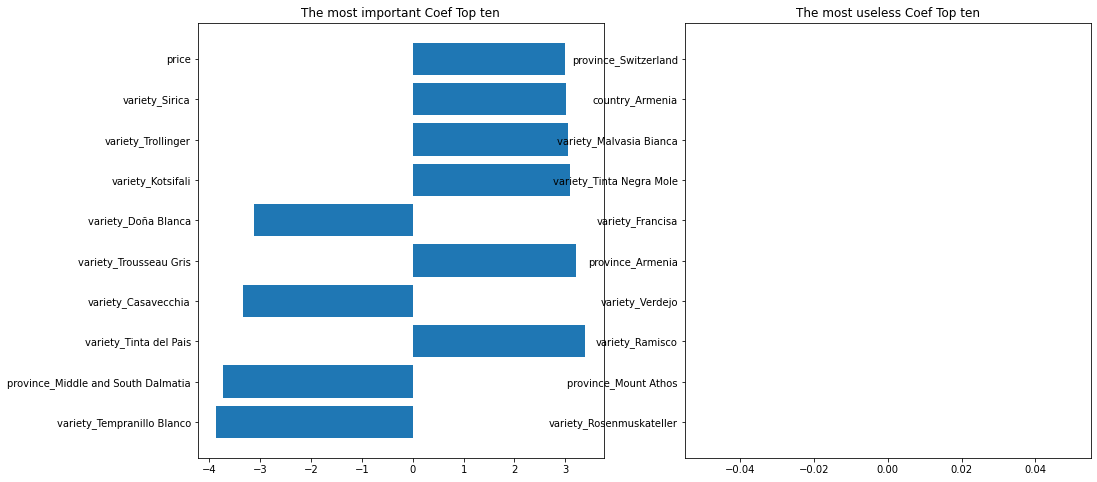

In [ ]:
print(f'Intercept : {lr.intercept_:.2f}')

# 계수들을 절대값 큰 순서대로 정렬
# 그 중 10개 관찰
coeff = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)

coeff_abs = np.abs(coeff.copy()) # 절대값 씌우기
sorted_index = coeff_abs.sort_values(ascending = False).index # 절대값 씌운 상태로 내림차순 정렬 후 인덱스 추출
sorted_index2 = coeff_abs.sort_values(ascending = True).index # 절대값 씌운 상태로 오름차순 정렬 후 인덱스 추출

print(coeff[sorted_index[:10]]) # 추출한 인덱스로 계수 절대값 큰 순서대로

fig, axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 2)

axes[0].set_title('The most important Coef Top ten')
axes[1].set_title('The most useless Coef Top ten')

axes[0].barh(sorted_index[:10], coeff[sorted_index[:10]])
axes[1].barh(sorted_index2[:10], coeff[sorted_index2[:10]])

plt.show()

정규화 때문에 의미없는 피쳐들의 계수는 사실상 0 에 수렴했음을 알 수 있다.   
variety피쳐가 제일 중요한 피쳐로 보인다.

## 2) RandomForestRegressor

In [ ]:
# 위에서 구한 best_rf 사용
# parameter : {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 15}
rf_pred = best_rf.predict(X_test)

In [ ]:
rf_pred[:10]

array([86.98774635, 90.33573178, 90.2571554 , 88.24850285, 87.92516482,
       88.06102714, 88.18111439, 87.03046545, 85.37908759, 84.70773398])

제일 중요한 피쳐 10개를 살펴보자

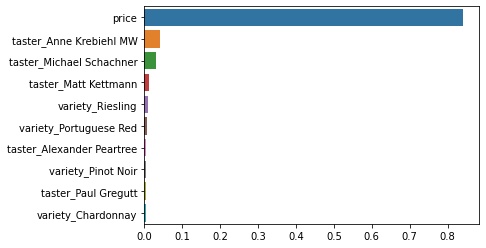

In [ ]:
feature_series = pd.Series(data = best_rf.feature_importances_, index = X_log.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series[:10], y = feature_series.index[:10])

3) Basic Decision Tree Regessor

In [ ]:
dt = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 5)

dt.fit(X_log, y)

dt_pred = dt.predict(X_test)

마차가지로 제일 중요한 피쳐 10개를 살펴보자

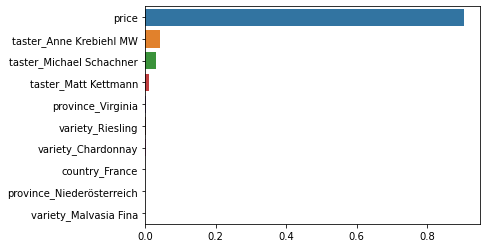

In [ ]:
feature_series = pd.Series(data = dt.feature_importances_, index = X_log.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series[:10], y = feature_series.index[:10])